# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# converting data to readable format and drop missing values

In [3]:
data = pd.read_csv("./dane_demograficzne_2024.csv", skipinitialspace=True)
# convert values to float and drop rows with missing values

data.replace(['X', '-'], pd.NA, inplace=True)
numerical_columns = ['Population', 'Marriages', 'Live Births', 'Deaths', 'Infant Deaths', 'Natural Increase',
                     'Internal Migration In', 'Internal Migration Out', 'Internal Migration Balance',
                     'Foreign Immigration', 'Foreign Emigration', 'Overall Migration Balance']

for column in numerical_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')
    data[column] = data[column].astype(float)

# Men and woman death comparison

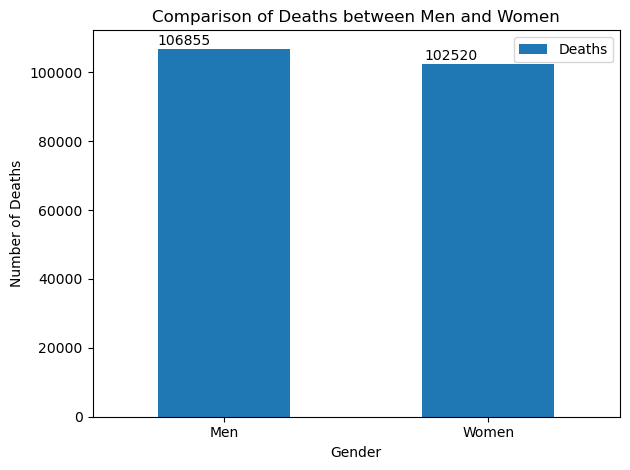

In [4]:
pivot_table = data.pivot_table(index='Category', values='Deaths', aggfunc='sum')
comparison = pivot_table.loc[['Men', 'Women']]
ax = comparison.plot(kind='bar', stacked=False)
plt.title('Comparison of Deaths between Men and Women')
plt.ylabel('Number of Deaths')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.savefig('./graphs/comparison_deaths_men_women.png')
plt.show()

# population in diffrent areas comparison

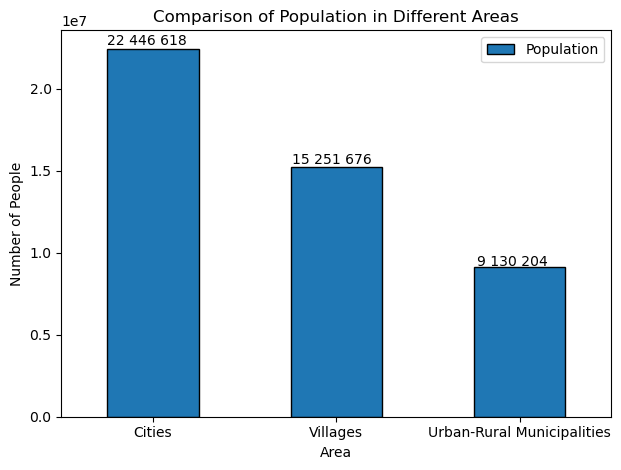

In [5]:
pivot_table = data.pivot_table(index='Category', values='Population', aggfunc='sum')
comparison = pivot_table.loc[['Cities', 'Villages', 'Urban-Rural Municipalities']] # Urban-Rural Municipalities - Gminy miejsko wiejskie
ax = comparison.plot(kind='bar', stacked=True, edgecolor='black')
plt.title('Comparison of Population in Different Areas')
plt.ylabel('Number of People')
plt.xlabel('Area')
plt.xticks(rotation=0)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}".replace(",", " "), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.savefig('./graphs/comparison_population_areas.png')
plt.show()

# birth and death rate comparison

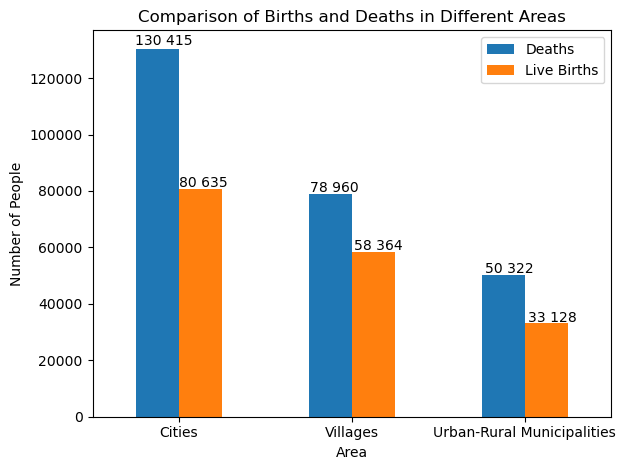

In [6]:
pivot_table = data.pivot_table(index='Category', values=['Live Births', 'Deaths'], aggfunc='sum')
comparison = pivot_table.loc[['Cities', 'Villages', 'Urban-Rural Municipalities']]
ax = comparison.plot(kind='bar', stacked=False)
plt.title('Comparison of Births and Deaths in Different Areas')
plt.ylabel('Number of People')
plt.xlabel('Area')
plt.xticks(rotation=0)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}".replace(",", " "), (p.get_x() * 1.01, p.get_height() * 1.01))
plt.savefig('./graphs/comparison_births_deaths_areas.png')
plt.show()

# natural increase comparison

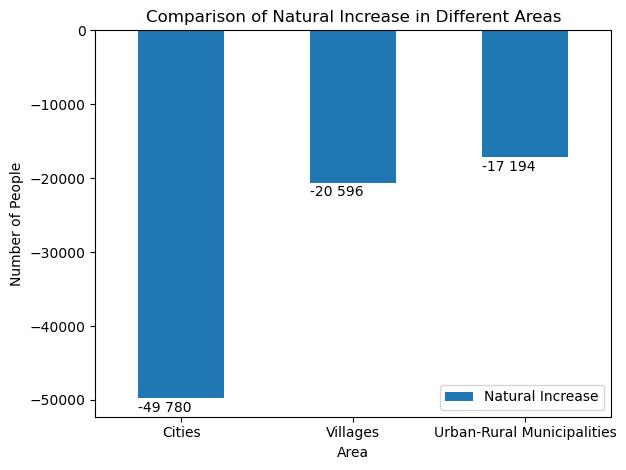

In [7]:
pivot_table = data.pivot_table(index='Category', values='Natural Increase', aggfunc='sum')
comparison = pivot_table.loc[['Cities', 'Villages', 'Urban-Rural Municipalities']]
ax = comparison.plot(kind='bar', stacked=False)
plt.title('Comparison of Natural Increase in Different Areas')
plt.ylabel('Number of People')
plt.xlabel('Area')
plt.xticks(rotation=0)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}".replace(",", " "), (p.get_x(), p.get_height()-1800))
plt.savefig('./graphs/comparison_natural_increase_areas.png')
plt.show()

# internal migration balance comparison in different areas

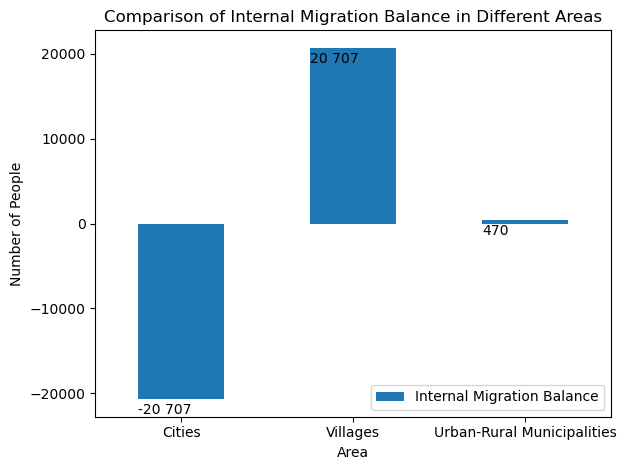

In [8]:
pivot_table = data.pivot_table(index='Category', values='Internal Migration Balance', aggfunc='sum')
comparison = pivot_table.loc[['Cities', 'Villages', 'Urban-Rural Municipalities']]
ax = comparison.plot(kind='bar', stacked=False)
plt.title('Comparison of Internal Migration Balance in Different Areas')
plt.ylabel('Number of People')
plt.xlabel('Area')
plt.xticks(rotation=0)
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}".replace(",", " "), (p.get_x(), p.get_height()-1800))
plt.savefig('./graphs/comparison_internal_migration_balance_areas.png')
plt.show()

# Heatmap of Correlation Matrix

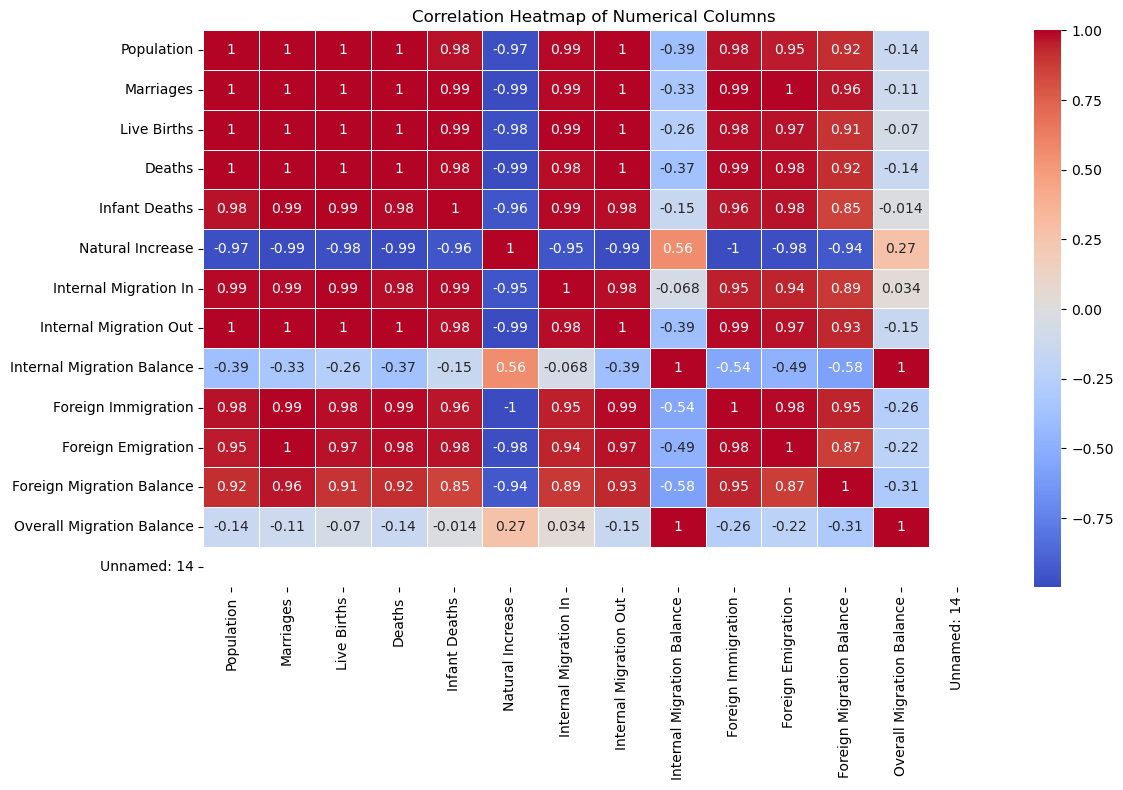

In [9]:
numeric_columns = data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.savefig('./graphs/correlation_heatmap.png')
plt.show()

# Scatter Plot of Population vs. Natural Increase

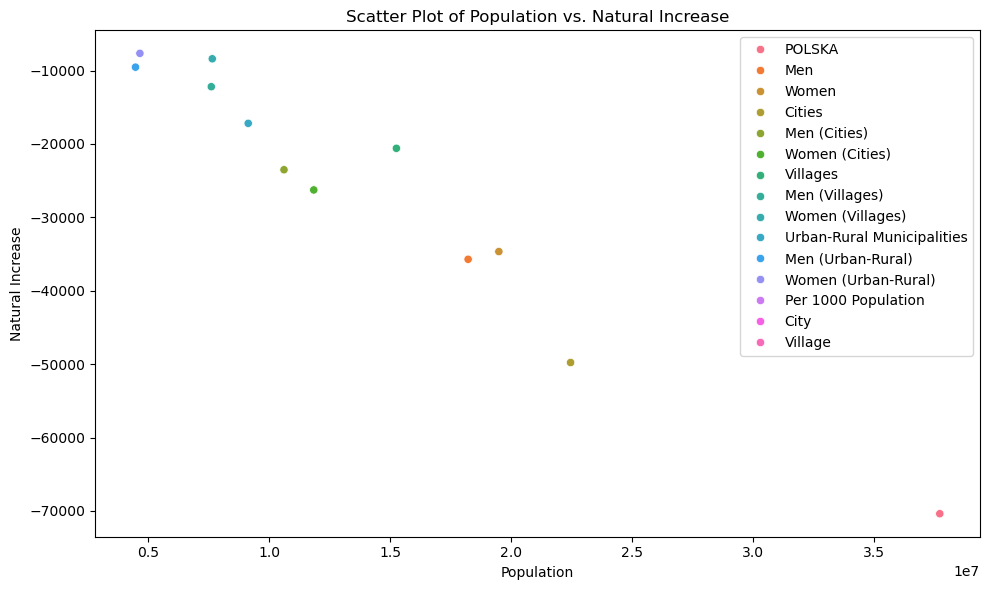

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='Natural Increase', hue='Category', data=data)
plt.title('Scatter Plot of Population vs. Natural Increase')
plt.xlabel('Population')
plt.ylabel('Natural Increase')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./graphs/scatter_population_natural_increase.png')
plt.show()

# Box Plot of Live Births by Category

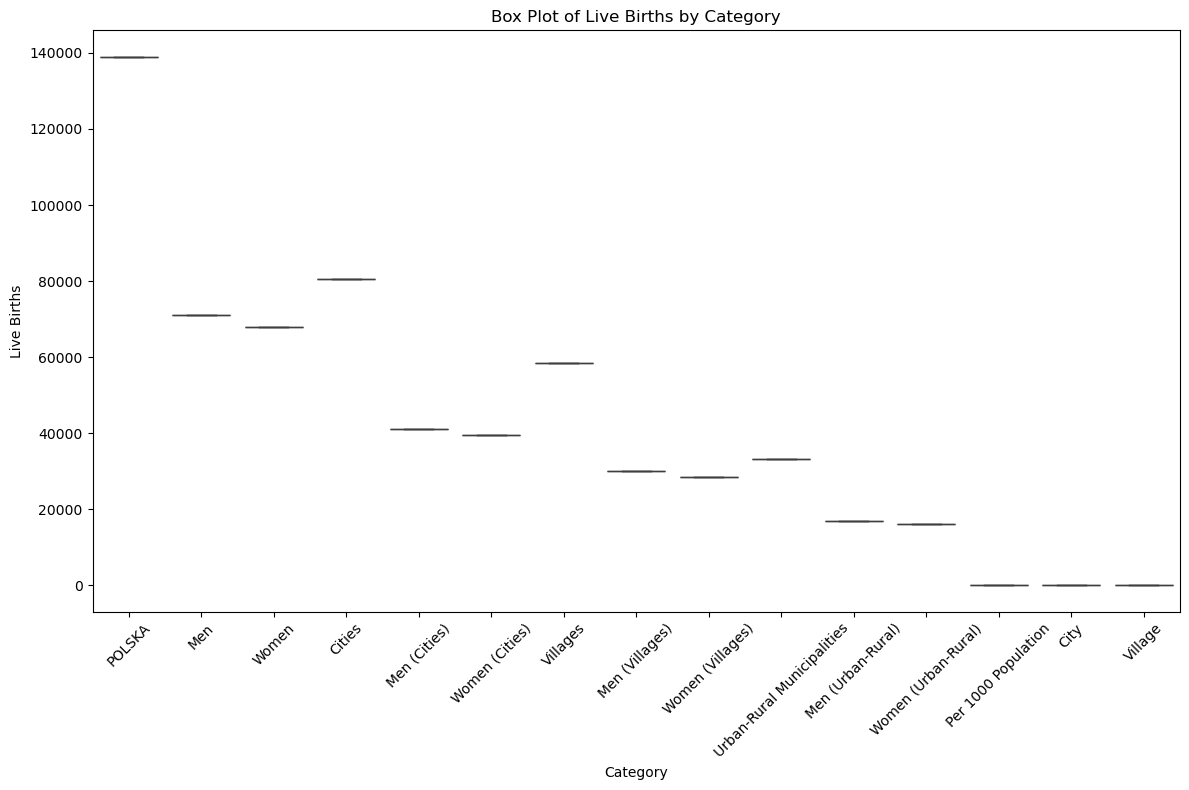

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Live Births', data=data)
plt.title('Box Plot of Live Births by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./graphs/boxplot_live_births.png')
plt.show()